In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

+ $\textbf{Testing With Command:}$ ```python lebwohl_lasher_s_numba.py 500 50 0.5 0```

$\textbf{1. Ensure Correct Plots Are Produced}$

In [2]:
def plot_data(data):
    """
    Plots energy and order parameter against Monte Carlo step.

    Parameters
    ----------
    data : pd.DataFrame
        The data from the Lebwohl-Lasher simulation.
    """

    # Plot energy and order parameter against Monte Carlo step.
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(data.index, data["Energy"])
    ax[1].plot(data.index, data["Order"])

    ax[0].set_title("Reduced Temperature = 0.5")
    ax[0].set_xlabel("Monte Carlo Step")
    ax[0].set_ylabel("Reduced Energy")

    ax[1].set_title("Reduced Temperature = 0.5")
    ax[1].set_xlabel("Monte Carlo Step")
    ax[1].set_ylabel("Order Parameter")

    fig.tight_layout()
    plt.show()

$\textbf{1.1 Base Version}$

+ ```lebwohl_lasher_s_numba.py Version: Commit - eee18d0f0785291a422ff1dcdacbd2219bbc124a```

In [3]:
# Read in the output data.
data_001 = pd.DataFrame(np.loadtxt("output_logs/output_normal_eee18d0f0785291a422ff1dcdacbd2219bbc124a.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2578.46 |  0.2829 |
|     1 |  0.6768 | -3798.16 |  0.2706 |
|     2 |  0.6176 | -4554.34 |  0.2863 |
|     3 |  0.578  | -5044.77 |  0.2895 |
|     4 |  0.5688 | -5432.22 |  0.2803 |


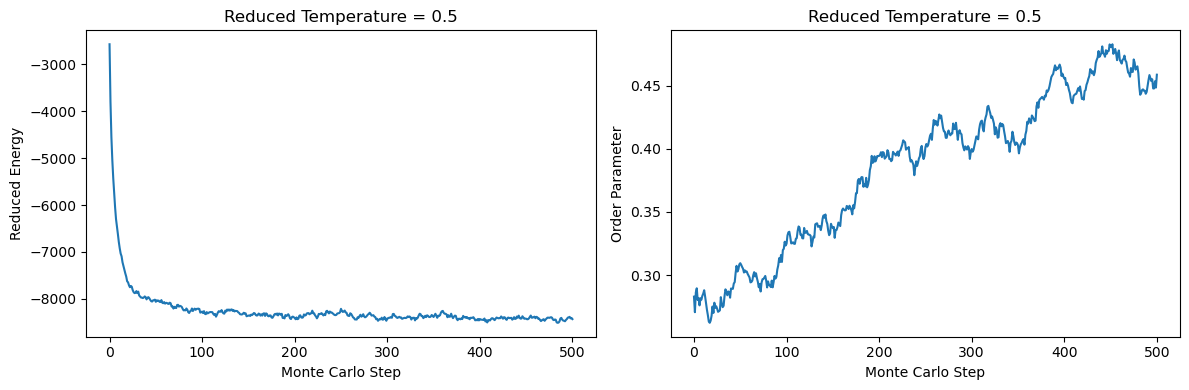

In [4]:
# Plot the output data.
plot_data(data_001)

$\textbf{1.2 Accelerated Function:}$ ```cell_energy```

+ ```lebwohl_lasher_s_numba.py Version: Commit - a0ff9422c93c91fe64cf1c40890a5761fbfabc43```

In [5]:
# Read in the output data.
data_002 = pd.DataFrame(np.loadtxt("output_logs/output_normal_a0ff9422c93c91fe64cf1c40890a5761fbfabc43.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2563.46 |  0.2605 |
|     1 |  0.6828 | -3668.79 |  0.2676 |
|     2 |  0.6164 | -4523.56 |  0.2723 |
|     3 |  0.5992 | -5120.05 |  0.2752 |
|     4 |  0.5664 | -5489.12 |  0.2754 |


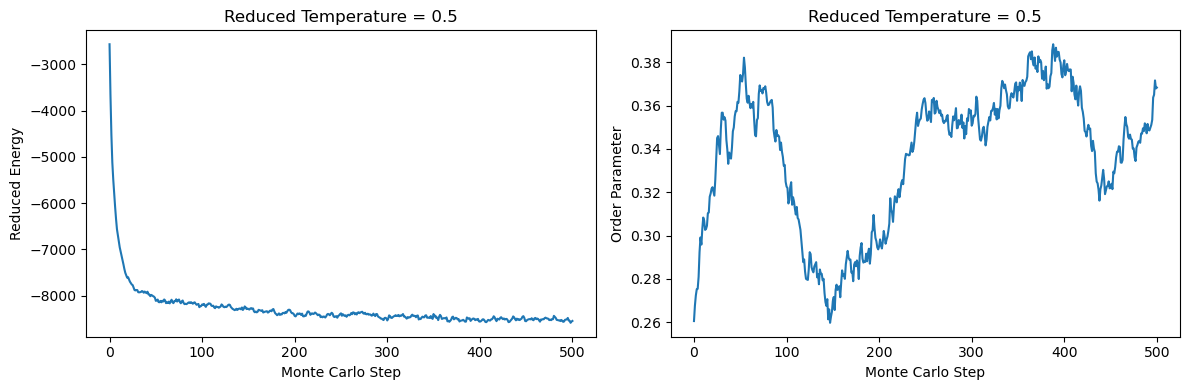

In [6]:
# Plot the output data.
plot_data(data_002)

$\textbf{2. Check Output Values Are Consistent}$

+ $\text{Test if the output logs across versions of the code are the same.}$
+ $\text{This is done through performing a simulation where the random seed is to 42.}$

- ```-> np.random.seed(42)```

$\textbf{2.1 Base Version}$

+ ```lebwohl_lasher_s_numba.py Version: Commit - eee18d0f0785291a422ff1dcdacbd2219bbc124a```

In [7]:
# Read in the data.
data_compare_001 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_eee18d0f0785291a422ff1dcdacbd2219bbc124a.txt", 
                                           dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2566.27 |  0.2711 |
|     1 |  0.6784 | -3780.83 |  0.2597 |
|     2 |  0.6064 | -4589.14 |  0.2604 |
|     3 |  0.5872 | -5126.1  |  0.2625 |
|     4 |  0.5668 | -5571.93 |  0.2654 |


$\textbf{2.2 Accelerated Function:}$ ```cell_energy```

+ ```lebwohl_lasher_s_numba.py Version: Commit - a0ff9422c93c91fe64cf1c40890a5761fbfabc43```

In [8]:
# Read in the data.
data_compare_002 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_a0ff9422c93c91fe64cf1c40890a5761fbfabc43.txt", 
                                           dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2566.27 |  0.2711 |
|     1 |  0.6784 | -3780.83 |  0.2597 |
|     2 |  0.6064 | -4589.14 |  0.2604 |
|     3 |  0.5872 | -5126.1  |  0.2625 |
|     4 |  0.5668 | -5571.93 |  0.2654 |


In [9]:
# Assert the new version produces data that is consistent.
np.allclose(data_compare_001, data_compare_002)

True

$\textbf{3. Time Specific Functions}$

In [10]:
# Import the script.
import lebwohl_lasher_s_numba

In [11]:
# Generate a lattice.
lattice_length = 50
lattice = lebwohl_lasher_s_numba.init_lattice(lattice_length)

# Generate two lattice positions to time the "cell_energy" function.
x_pos, y_pos = np.random.randint(0, high=lattice_length, size=2)

$\textbf{3.1 Base Version}$

+ ```lebwohl_lasher_s_numba.py Version: Commit - eee18d0f0785291a422ff1dcdacbd2219bbc124a```

In [ ]:
# # Time the "cell_energy" function.
# %timeit lebwohl_lasher_s_numba.cell_energy(lattice, lattice_length, x_pos, y_pos)

6.29 μs ± 355 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
# # Time the "total_energy" function.
# %timeit lebwohl_lasher_s_numba.total_energy(lattice, lattice_length)

13.5 ms ± 507 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# # Time the "calculate_order" function.
# %timeit lebwohl_lasher_s_numba.calculate_order(lattice, lattice_length)

14.1 ms ± 442 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# # Time the "monte_carlo_step" function.
# %timeit lebwohl_lasher_s_numba.monte_carlo_step(lattice, lattice_length, temperature=0.5)

33.6 ms ± 887 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


$\textbf{3.2 Accelerated Function:}$ ```cell_energy```

+ ```lebwohl_lasher_s_numba.py Version: Commit - a0ff9422c93c91fe64cf1c40890a5761fbfabc43```

In [13]:
# Time the "cell_energy" function.
%timeit lebwohl_lasher_s_numba.cell_energy(lattice, lattice_length, x_pos, y_pos)

496 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
